In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('./data/data.csv')
pd.set_option('display.max_columns', None) #permet d'afficher toutes les colonnes
data

,id,score,game_time,snake_head_x,snake_head_y,current_food_position_x,current_food_position_y,previous_food_position_x,previous_food_position_y,board_width,board_height
0,1,1,21714.0,69,28,12,21,15,15,70,29
1,2,1,16566.0,0,0,64,16,15,15,70,29
2,3,3,25207.0,46,0,18,22,46,3,53,31
3,4,1,25098.0,21,30,17,9,15,15,53,31
4,5,1,16394.0,31,0,33,2,15,15,53,31
...,...,...,...,...,...,...,...,...,...,...,...
81,82,7,53460.0,69,9,69,20,25,8,70,29
82,83,15,79008.0,68,0,67,9,64,16,70,29
83,84,0,16901.0,69,0,15,15,64,16,70,29
84,85,1,10322.0,15,28,28,27,15,15,70,29


In [5]:
data['game_time'] = data['game_time'] // 1000
data['game_time'] = data['game_time'].round(0)
data

,id,score,game_time,snake_head_x,snake_head_y,current_food_position_x,current_food_position_y,previous_food_position_x,previous_food_position_y,board_width,board_height
0,1,1,21.0,69,28,12,21,15,15,70,29
1,2,1,16.0,0,0,64,16,15,15,70,29
2,3,3,25.0,46,0,18,22,46,3,53,31
3,4,1,25.0,21,30,17,9,15,15,53,31
4,5,1,16.0,31,0,33,2,15,15,53,31
...,...,...,...,...,...,...,...,...,...,...,...
81,82,7,53.0,69,9,69,20,25,8,70,29
82,83,15,79.0,68,0,67,9,64,16,70,29
83,84,0,16.0,69,0,15,15,64,16,70,29
84,85,1,10.0,15,28,28,27,15,15,70,29


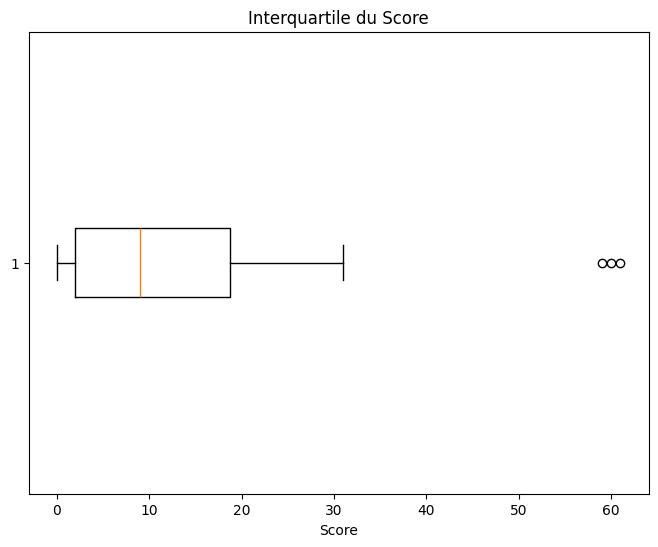

In [8]:
import matplotlib.pyplot as plt
df_score = pd.DataFrame(data['score'])

plt.figure(figsize=(8, 6))
plt.boxplot(df_score.values, vert=False, showfliers=True)
plt.xlabel('Score')
plt.title('Interquartile du Score')

plt.show()

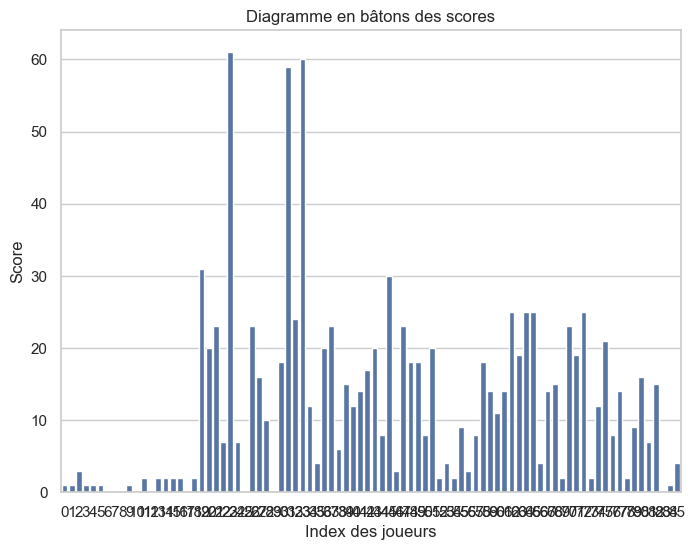

In [15]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que 'data' soit un DataFrame contenant une colonne 'score'
df_score = pd.DataFrame(data['score'])

# Création de l'axe des catégories et des scores moyens
plt.figure(figsize=(8, 6))
sns.barplot(x=df_score.index, y=df_score['score'])

# Ajout des étiquettes et du titre
plt.xlabel('Index des joueurs')
plt.ylabel('Score')
plt.title('Diagramme en bâtons des scores')

plt.show()

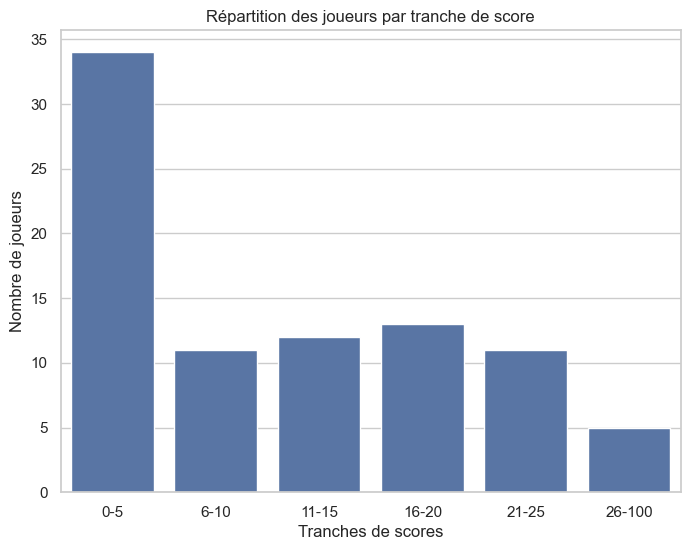

In [20]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que 'data' contienne une colonne 'score'
df_score = pd.DataFrame(data['score'])

# Créer des bins (tranches de scores)
bins = [0, 5, 10, 15, 20, 25, 100]  # Tranches de score
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-100']  # Étiquettes pour les tranches

# Ajouter une nouvelle colonne avec les tranches de score
df_score['score_bins'] = pd.cut(df_score['score'], bins=bins, labels=labels, include_lowest=True)

# Compter le nombre de joueurs dans chaque tranche
score_distribution = df_score['score_bins'].value_counts().sort_index()

# Création du diagramme en bâtons
plt.figure(figsize=(8, 6))
sns.barplot(x=score_distribution.index, y=score_distribution.values)

# Ajouter des étiquettes et un titre
plt.xlabel('Tranches de scores')
plt.ylabel('Nombre de joueurs')
plt.title('Répartition des joueurs par tranche de score')

plt.show()


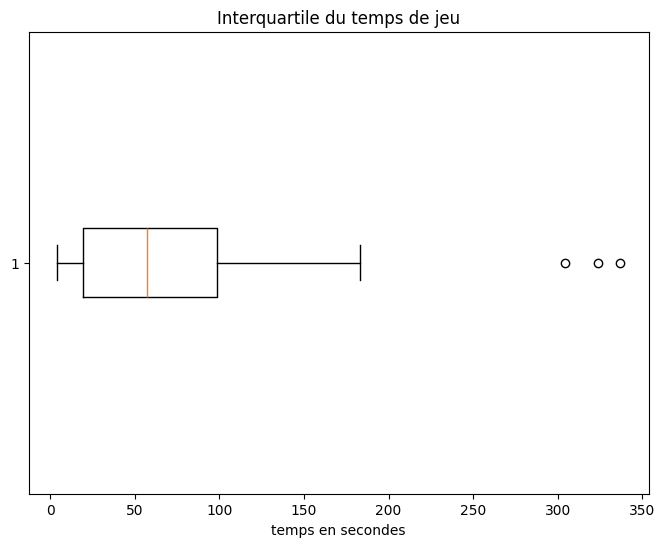

In [9]:
import matplotlib.pyplot as plt
df_time= pd.DataFrame(data['game_time'])

plt.figure(figsize=(8, 6))
plt.boxplot(df_time.values, vert=False, showfliers=True)
plt.xlabel('temps en secondes')
plt.title('Interquartile du temps de jeu')

plt.show()

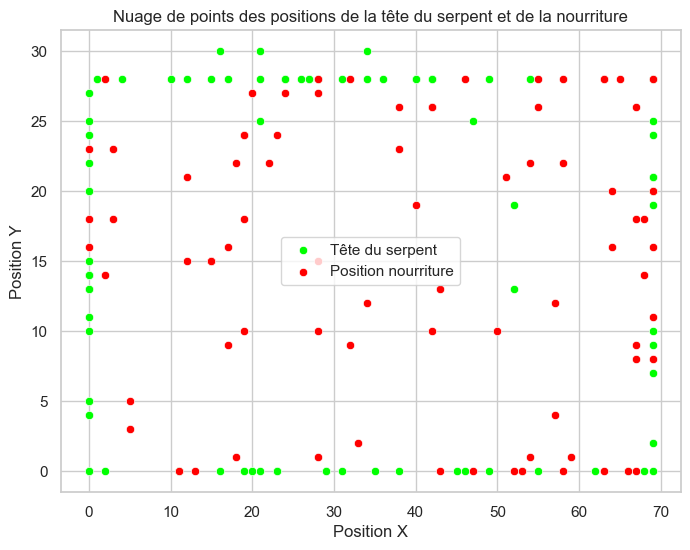

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que 'data' soit votre DataFrame contenant les colonnes 'snake_head_x', 'snake_head_y',
# 'current_food_position_x' et 'current_food_position_y'
plt.figure(figsize=(8, 6))

# Créer le nuage de points pour la tête du serpent en vert (ou HEX '#00FF00')
sns.scatterplot(x=data['snake_head_x'], y=data['snake_head_y'], color='#00FF00', label='Tête du serpent')

# Créer le nuage de points pour la position de la nourriture en rouge (ou HEX '#FF0000')
sns.scatterplot(x=data['current_food_position_x'], y=data['current_food_position_y'], color='#FF0000', label='Position nourriture')

# Ajouter des étiquettes et un titre
plt.xlabel('Position X')
plt.ylabel('Position Y')
plt.title('Nuage de points des positions de la tête du serpent et de la nourriture')

# Ajouter une légende pour distinguer les points
plt.legend()

# Afficher le graphique
plt.show()
